In [442]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [443]:
df = pd.read_csv("Sepsis_Cases_Log.csv")

In [444]:
df = df.drop(columns=['org:group', 'Complete Timestamp', 'Variant', 'Variant index', 'Diagnose', 'lifecycle:transition'])

In [445]:
df.head(30)

,Case ID,Activity,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,ER Sepsis Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A,IV Liquid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,IV Antibiotics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,Admission NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN


In [446]:
df_act_flow = pd.DataFrame()

# Loop through each unique Case ID
for case in df['Case ID'].unique():
    # Filter the merged_df for the current Case ID
    case_merged_df = df[df['Case ID'] == case]
    
    # Extract the activities as a list
    activity_flow = case_merged_df['Activity'].tolist()
    
    # Add the Case ID as the first column and the activities as subsequent columns
    row_merged_df = [case] + activity_flow
    
    # Append the row to the final DataFrame
    df_act_flow = pd.concat([df_act_flow, pd.DataFrame([row_merged_df])], ignore_index=True)

# Rename columns: first column as 'Case ID', remaining columns as 'Activity 1', 'Activity 2', etc.
columns = ['Case ID'] + [f'Activity {i+1}' for i in range(df_act_flow.shape[1] - 1)]
df_act_flow.columns = columns

# Inspect the resulting DataFrame
print(df_act_flow.head(10))



  Case ID       Activity 1  Activity 2        Activity 3      Activity 4  \
0       A  ER Registration  Leucocytes               CRP      LacticAcid   
1       B  ER Registration   ER Triage               CRP      LacticAcid   
2       C  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
3       D  ER Registration   ER Triage  ER Sepsis Triage             CRP   
4       E  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
5       F  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
6       G  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
7       H  ER Registration   ER Triage  ER Sepsis Triage             CRP   
8       I  ER Registration   ER Triage  ER Sepsis Triage  IV Antibiotics   
9       J  ER Registration   ER Triage  ER Sepsis Triage             CRP   

       Activity 5        Activity 6      Activity 7      Activity 8  \
0       ER Triage  ER Sepsis Triage       IV Liquid  IV Antibiotics   
1      Leucocytes  ER

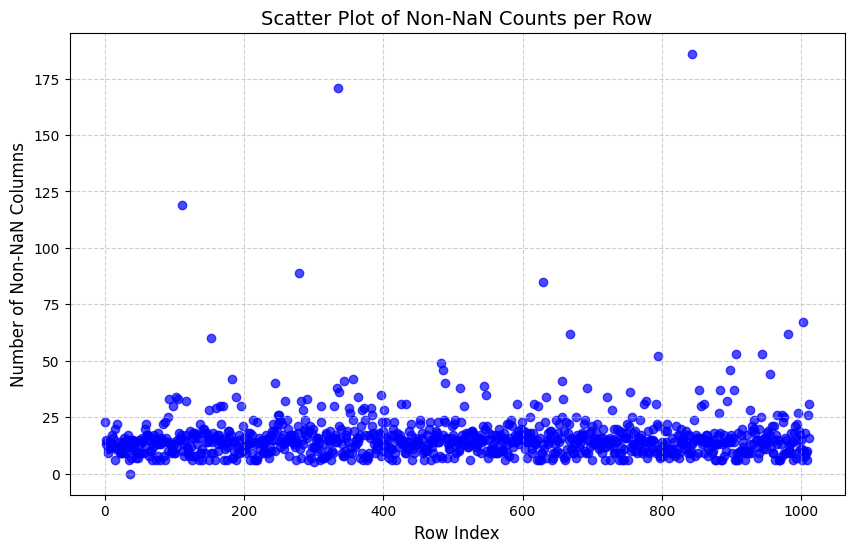

In [447]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow.index, df_act_flow['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [448]:
# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Filter rows to keep only those with Non-NaN Count <= 50
df_act_flow_filtered = df_act_flow[df_act_flow['Non-NaN Count'] <= 30]

# Step 3: Drop the 'Non-NaN Count' column as it is no longer needed
df_act_flow_filtered = df_act_flow_filtered.drop(columns=['Non-NaN Count'])

# Display the filtered merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 176,Activity 177,Activity 178,Activity 179,Activity 180,Activity 181,Activity 182,Activity 183,Activity 184,Activity 185
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
# Step 4: Keep only the first 52 columns
df_act_flow_filtered = df_act_flow_filtered.iloc[:, :30]

# Display the updated merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 20,Activity 21,Activity 22,Activity 23,Activity 24,Activity 25,Activity 26,Activity 27,Activity 28,Activity 29
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,CRP,Leucocytes,Release A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
df_act_flow_filtered.shape

(949, 30)

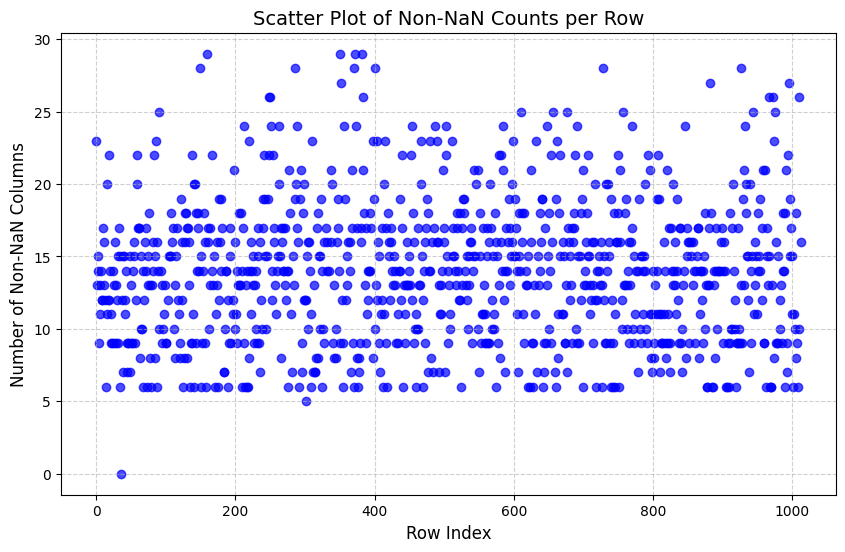

In [451]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow_filtered['Non-NaN Count'] = df_act_flow_filtered.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow_filtered.index, df_act_flow_filtered['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [452]:
# Filter the merged_dfFrame to include only rows where Activity == 'ER Registration'
df_er_registration = df[df['Activity'] == 'ER Registration']

# Reset index for cleanliness (optional)
df_er_registration = df_er_registration.reset_index(drop=True)

df_er_registration.shape

(1013, 28)

In [453]:
df_other_attributes = df_er_registration.drop(columns=['Activity', 'Leucocytes', 'CRP', 'LacticAcid'])
df_other_attributes.head()

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,True,True,True,True,True,True,True,True,85.0,...,True,True,True,True,False,False,True,False,True,True
1,B,True,True,False,True,False,True,True,False,45.0,...,True,True,True,True,False,False,True,False,True,True
2,C,True,True,False,False,False,True,True,True,55.0,...,True,False,True,True,False,False,True,False,True,True
3,D,True,True,False,True,False,True,True,True,70.0,...,True,True,True,False,False,False,True,False,False,True
4,E,True,True,False,True,False,True,True,True,75.0,...,True,True,True,True,False,False,True,False,True,True


In [454]:
df_diagnosis = df[['Case ID', 'Activity','Leucocytes', 'CRP', 'LacticAcid']]
df_diagnosis = df_diagnosis.dropna(subset=['Leucocytes', 'CRP', 'LacticAcid'], how='all', ignore_index=True)
columns_to_convert = ['Leucocytes', 'CRP', 'LacticAcid']
df_diagnosis[columns_to_convert]=df_diagnosis[columns_to_convert].astype(float)
df_diagnosis.head(20)

,Case ID,Activity,Leucocytes,CRP,LacticAcid
0,A,Leucocytes,9.6,NaN,NaN
1,A,CRP,NaN,21.0,NaN
2,A,LacticAcid,NaN,NaN,2.2
3,A,CRP,NaN,109.0,NaN
4,A,Leucocytes,8.7,NaN,NaN
5,A,Leucocytes,9.6,NaN,NaN
6,A,CRP,NaN,47.0,NaN
7,A,Leucocytes,10.7,NaN,NaN
8,A,CRP,NaN,15.0,NaN
9,A,CRP,NaN,9.0,NaN


In [455]:
df_other_attributes.shape

(1013, 24)

In [456]:
# Exclude the 'Case ID' and 'Age' columns
columns_to_count = [col for col in df_other_attributes.columns if col not in ['Case ID', 'Age']]

# Create a dictionary to store counts of True and False for each column
true_false_counts = {col: df_other_attributes[col].value_counts() for col in columns_to_count}

# Convert the counts to a DataFrame for better readability
result_df = pd.DataFrame(true_false_counts).fillna(0).astype(int).T  # Transpose for better display
result_df.columns = ['False', 'True']  # Rename the columns
result_df = result_df[['True', 'False']]  # Reorder for clarity

print(result_df)


                           True  False
InfectionSuspected          848    165
DiagnosticBlood             823    190
DisfuncOrg                   69    944
SIRSCritTachypnea           601    412
Hypotensie                   54    959
SIRSCritHeartRate           810    203
Infusion                    796    217
DiagnosticArtAstrup         297    716
DiagnosticIC                848    165
DiagnosticSputum             29    984
DiagnosticLiquor              5   1008
DiagnosticOther              10   1003
SIRSCriteria2OrMore         853    160
DiagnosticXthorax           785    228
SIRSCritTemperature         800    213
DiagnosticUrinaryCulture    476    537
SIRSCritLeucos               49    964
Oligurie                     25    988
DiagnosticLacticAcid        804    209
Hypoxie                      20    993
DiagnosticUrinarySediment   519    494
DiagnosticECG               765    248


In [457]:
# List of columns to drop
columns_to_drop = ['DiagnosticLiquor', 'DiagnosticOther', 'SIRSCritLeucos', 'Oligurie', 'Hypoxie']

# Drop the columns from the DataFrame
df_other_attributes = df_other_attributes.drop(columns=columns_to_drop)

# Verify the remaining columns
print(df_other_attributes.columns)


Index(['Case ID', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
       'DiagnosticUrinarySediment', 'DiagnosticECG'],
      dtype='object')


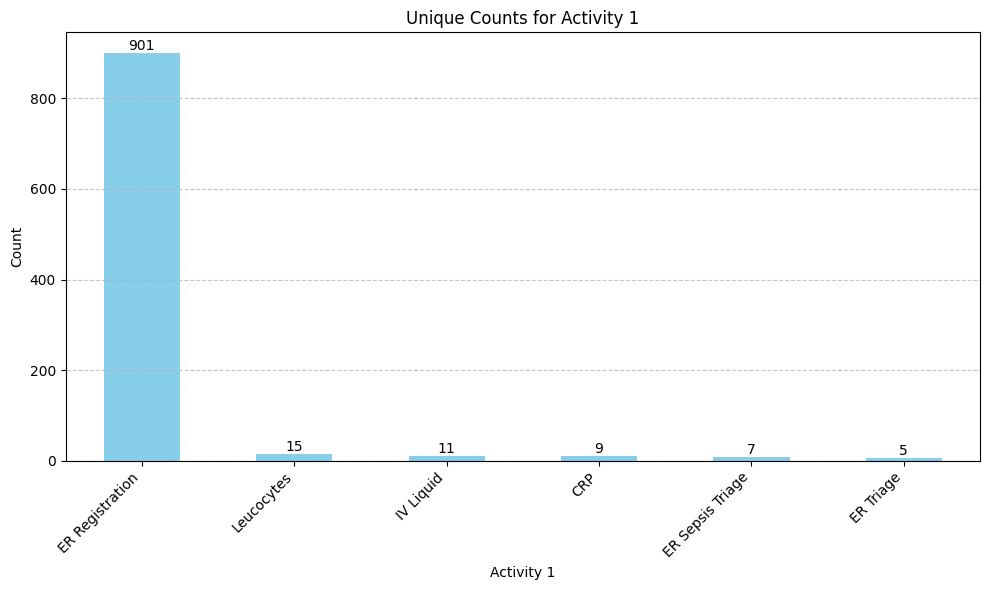

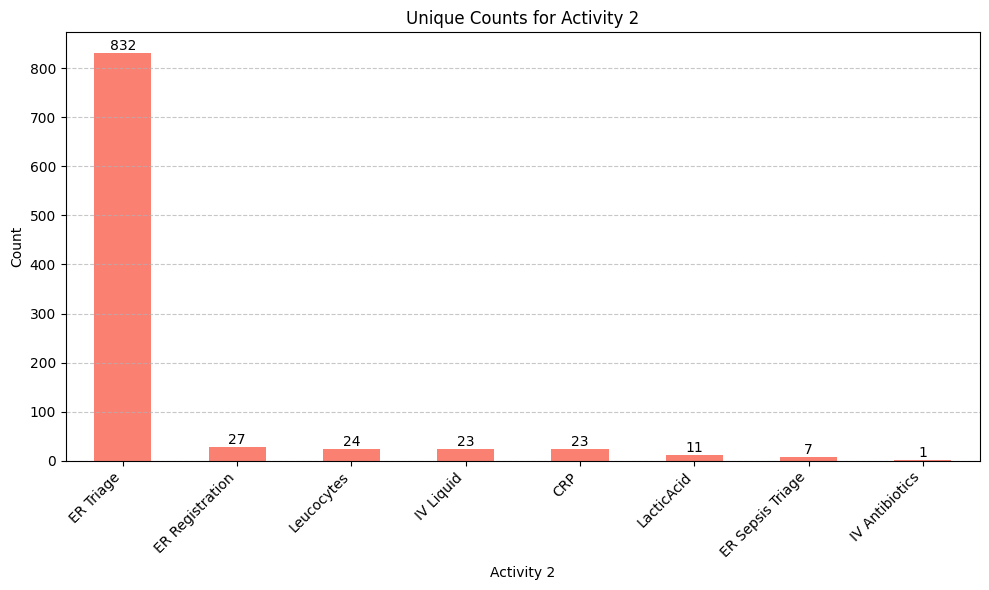

In [458]:
# Count unique values in Activity 1
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()

# Count unique values in Activity 2
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

import matplotlib.pyplot as plt

# Count unique values in Activity 1 and Activity 2
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

# Function to add value labels on top of the bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Create bar chart for Activity 1
plt.figure(figsize=(10, 6))
ax1 = activity_1_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Counts for Activity 1')
plt.xlabel('Activity 1')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax1)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Create bar chart for Activity 2
plt.figure(figsize=(10, 6))
ax2 = activity_2_counts.plot(kind='bar', color='salmon')
plt.title('Unique Counts for Activity 2')
plt.xlabel('Activity 2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax2)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [460]:
# Step 1: Filter df_act_flow_filtered based on Activity 1 and Activity 2 conditions
valid_case_ids = df_act_flow_filtered[
    (df_act_flow_filtered['Activity 1'] == 'ER Registration') &
    (df_act_flow_filtered['Activity 2'] == 'ER Triage')
]['Case ID']

# Step 2: Retain only rows with valid Case IDs in df_other_attributes and df_diagnosis
df_act_flow_filtered = df_act_flow_filtered[df_act_flow_filtered['Case ID'].isin(valid_case_ids)]
df_other_attributes = df_other_attributes[df_other_attributes['Case ID'].isin(valid_case_ids)]
df_diagnosis = df_diagnosis[df_diagnosis['Case ID'].isin(valid_case_ids)]



In [464]:
df_act_flow_filtered.to_csv('Sepsis_Activity_Flow.csv', index=False)
df_other_attributes.to_csv('Sepsis_Other_Attributes.csv', index=False)
df_diagnosis.to_csv('Sepsis_Diagnosis.csv', index=False)

In [467]:
# Merge merged_dfsets on 'Case ID'
merged_df = (
    df_act_flow_filtered
    .merge(df_diagnosis, on="Case ID", how="left")
    .merge(df_other_attributes, on="Case ID", how="left")
)

# Display a summary of the merged merged_dfset
merged_df.head(30)


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Age,DiagnosticIC,DiagnosticSputum,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,DiagnosticLacticAcid,DiagnosticUrinarySediment,DiagnosticECG
0,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
2,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
3,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
4,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
5,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,55.0,True,False,True,False,True,True,True,True,True
6,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,55.0,True,False,True,False,True,True,True,True,True
7,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,55.0,True,False,True,False,True,True,True,True,True
8,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,55.0,True,False,True,False,True,True,True,True,True
9,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,55.0,True,False,True,False,True,True,True,True,True


In [466]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# ---------- STEP 1: MODEL TO PREDICT SECOND ACTIVITY ----------

# Select features from Other Attributes dataset
X = merged_df[['InfectionSuspected', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie',
              'SIRSCritHeartRate', 'SIRSCriteria2OrMore', 'SIRSCritTemperature',
              'DiagnosticBlood', 'DiagnosticArtAstrup', 'Age', 'DiagnosticIC',
              'DiagnosticSputum', 'DiagnosticXthorax', 'DiagnosticLacticAcid',
              'DiagnosticUrinaryCulture', 'DiagnosticUrinarySediment', 'DiagnosticECG',
              'Infusion']]  # Use all relevant columns

# Target: Second Activity
y = merged_df['Activity 2']  # Assuming 'Activity_2' represents the second activity

# Encode target variable
activity_mapping = {activity: idx for idx, activity in enumerate(y.unique())}
y_encoded = y.map(activity_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale only 'Age' column
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])  # Scale 'Age'
X_test['Age'] = scaler.transform(X_test[['Age']])       # Scale 'Age'

# Train model
rf_second_activity = RandomForestClassifier(n_estimators=100, random_state=42)
rf_second_activity.fit(X_train, y_train)

# Evaluate model
y_pred = rf_second_activity.predict(X_test)
print("Accuracy for Second Activity:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------- STEP 2: RULES FOR SUBSEQUENT ACTIVITIES ----------

# # Function to predict next activity based on diagnosis values
# def predict_next_activity(current_activity, leucocytes, crp, lactic_acid):
#     if current_activity == 'Leucocytes':
#         if leucocytes > 15:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'CRP'
#     elif current_activity == 'CRP':
#         if crp > 100:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'LacticAcid'
#     elif current_activity == 'LacticAcid':
#         if lactic_acid > 2.0:  # Example threshold
#             return 'ICU Admit'
#         else:
#             return 'Discharge'
#     else:
#         return 'END'

# ---------- STEP 3: FINAL PREDICTION PIPELINE ----------

def predict_pipeline():
    print("\n--- Patient Information ---")
    # Collect user input
    age = float(input("Age: "))
    infection_suspected = int(input("Infection Suspected (0 or 1): "))
    disfunc_org = int(input("Organ Dysfunction (0 or 1): "))
    sirs_criteria = int(input("SIRS Criteria 2 or more (0 or 1): "))
    hypotensie = int(input("Hypotension (0 or 1): "))
    diagnostic_blood = int(input("Diagnostic Blood (0 or 1): "))
    diagnostic_lactic_acid = int(input("Diagnostic Lactic Acid (0 or 1): "))

    # Predict Second Activity
    input_features = np.array([[infection_suspected, disfunc_org, 0, hypotensie, 0,
                                sirs_criteria, 0, diagnostic_blood, 0, age,
                                0, 0, 0, diagnostic_lactic_acid, 0, 0, 0, 0]])  # Replace 0s if more inputs are needed
    input_scaled = scaler.transform(input_features[:, [9]])  # Scale only 'Age'
    input_features[:, 9] = input_scaled[:, 0]  # Replace scaled 'Age'

    second_activity_pred = rf_second_activity.predict(input_features)[0]
    second_activity = [key for key, value in activity_mapping.items() if value == second_activity_pred][0]
    print(f"Predicted Second Activity: {second_activity}")

    # Predict Subsequent Activities
    # current_activity = second_activity
    # while current_activity != 'END':
    #     # Get diagnostic values
    #     leucocytes = float(input(f"{current_activity} - Leucocytes: "))
    #     crp = float(input(f"{current_activity} - CRP: "))
    #     lactic_acid = float(input(f"{current_activity} - Lactic Acid: "))

    #     # Predict next activity based on diagnosis trends
    #     next_activity = predict_next_activity(current_activity, leucocytes, crp, lactic_acid)
    #     print(f"Next Activity: {next_activity}")

    #     # Update current activity
    #     if next_activity == 'END':
    #         break
    #     current_activity = next_activity

# Call the pipeline
predict_pipeline()


Accuracy for Second Activity: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504

    accuracy                           1.00      1504
   macro avg       1.00      1.00      1.00      1504
weighted avg       1.00      1.00      1.00      1504


--- Patient Information ---


ValueError: could not convert string to float: ''

In [ ]:
import numpy as np

# Extract activity columns
activity_cols = [col for col in merged_df.columns if 'Activity' in col and col != 'Activity']

# Create sequences and next activity columns
merged_df['Activity_Sequence'] = merged_df[activity_cols].values.tolist()
merged_df['Next_Activity'] = merged_df[activity_cols].shift(-1, axis=1).iloc[:, 0]

# Drop redundant activity columns
merged_df = merged_df.drop(columns=activity_cols)

# Handle missing values in the 'Next_Activity' column
merged_df['Next_Activity'].fillna('END', inplace=True)

# Encode activities as categorical values for modeling
activity_mapping = {activity: idx for idx, activity in enumerate(pd.unique(merged_df['Next_Activity']))}
merged_df['Next_Activity_Encoded'] = merged_df['Next_Activity'].map(activity_mapping)

# Display the processed activity flow portion
activity_flow_preview = merged_df[['Activity_Sequence', 'Next_Activity', 'Next_Activity_Encoded']].head()

activity_flow_preview, activity_mapping


C:\Users\hskma\AppData\Local\Temp\ipykernel_12432\3923583820.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Next_Activity'].fillna('END', inplace=True)


(                                   Activity_Sequence Next_Activity  \
 0  [ER Registration, ER Triage, CRP, LacticAcid, ...     ER Triage   
 1  [ER Registration, ER Triage, CRP, LacticAcid, ...     ER Triage   
 2  [ER Registration, ER Triage, CRP, LacticAcid, ...     ER Triage   
 3  [ER Registration, ER Triage, CRP, LacticAcid, ...     ER Triage   
 4  [ER Registration, ER Triage, CRP, LacticAcid, ...     ER Triage   
 
    Next_Activity_Encoded  
 0                      0  
 1                      0  
 2                      0  
 3                      0  
 4                      0  ,
 {'ER Triage': 0})

In [ ]:
# Aggregate diagnostic test values for each case
diagnostic_summary = merged_df.groupby('Case ID').agg({
    'Leucocytes': ['mean', 'max', 'min', 'last'],
    'CRP': ['mean', 'max', 'min', 'last'],
    'LacticAcid': ['mean', 'max', 'min', 'last']
}).reset_index()

# Flatten column names
diagnostic_summary.columns = ['_'.join(col).strip() for col in diagnostic_summary.columns.values]
diagnostic_summary.rename(columns={'Case ID_': 'Case ID'}, inplace=True)

# Merge diagnostic summary back into main data
merged_df = pd.merge(merged_df, diagnostic_summary, on='Case ID', how='left')

# Preview the summarized diagnostic data
print(diagnostic_summary.head())


  Case ID  Leucocytes_mean  Leucocytes_max  Leucocytes_min  Leucocytes_last  \
0      AA             8.60             8.6             8.6              8.6   
1     AAA            20.80            20.8            20.8             20.8   
2      AB            15.70            15.7            15.7             15.7   
3     ABA             3.28             5.2             2.0              5.2   
4      AC             7.55             8.8             6.3              6.3   

   CRP_mean  CRP_max  CRP_min  CRP_last  LacticAcid_mean  LacticAcid_max  \
0      23.0     23.0     23.0      23.0              1.4             1.4   
1      68.0     68.0     68.0      68.0              2.4             2.4   
2      48.0     48.0     48.0      48.0              1.3             1.3   
3     105.0    140.0     78.0     140.0              2.1             2.1   
4      77.0     94.0     60.0      60.0              1.5             1.5   

   LacticAcid_min  LacticAcid_last  
0             1.4              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Handle missing values (replace with median for numeric data)
merged_df.fillna(merged_df.median(numeric_only=True), inplace=True)

# Features and target
X = merged_df.drop(columns=['Case ID', 'Next_Activity', 'Next_Activity_Encoded', 'Activity_Sequence'])
y = merged_df['Next_Activity_Encoded']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'CRP'

In [ ]:
import numpy as np

# Function to take user input
def predict_next_activity(model, scaler, activity_mapping):
    print("\nProvide the following details for prediction:\n")

    # Collect patient attributes
    age = float(input("Age: "))
    sirs_criteria = int(input("SIRS Criteria (0 or 1): "))
    diagnostic_flag = int(input("Diagnostic Flag (0 or 1): "))

    # Collect diagnostic test results
    leucocytes = float(input("Leucocytes (latest value): "))
    crp = float(input("CRP (latest value): "))
    lactic_acid = float(input("Lactic Acid (latest value): "))

    # Create input feature array
    input_data = np.array([[age, sirs_criteria, diagnostic_flag, 
                            leucocytes, crp, lactic_acid]])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the next activity
    prediction = model.predict(input_data_scaled)[0]
    
    # Decode the prediction
    predicted_activity = [key for key, value in activity_mapping.items() if value == prediction][0]

    print(f"\nPredicted Next Activity: {predicted_activity}")

# Call the function to predict
#predict_next_activity(rf_model, scaler, activity_mapping)



Provide the following details for prediction:

